In [ ]:
# Bibliotecas

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

path = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'

In [ ]:
#@markdown `tspplot()`
#@markdown `tspdisplay()`

def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):

  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()

  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))

  if label is not None:
    plt.legend()

  plt.tight_layout()

  return


class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

<head>
  <meta name="author" content="Orlando">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://www.orlandoalbarracin.com.br/phyton/mackenzie-logo.png" width=300, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->




## <font color='red'>Série Temporais </font>

## Introdução

Uma série temporal é uma sequência de observações de uma variável ao longo do tempo, obtidas em intervalos de tempo regulares. Essas observações podem ser coletadas em ordem cronológica.

Em análise de séries temporais, os métodos estatísticos e matemáticos são aplicados para modelar e prever o comportamento futuro da variável com base em suas observações passadas. Isso inclui a identificação de padrões sazonais, tendências de longo prazo, ciclos e flutuações aleatórias. As técnicas mais comuns usadas na análise de séries temporais incluem suavização exponencial, modelos ARIMA (AutoRegressive Integrated Moving Average), modelos de regressão sazonal e muitos outros.

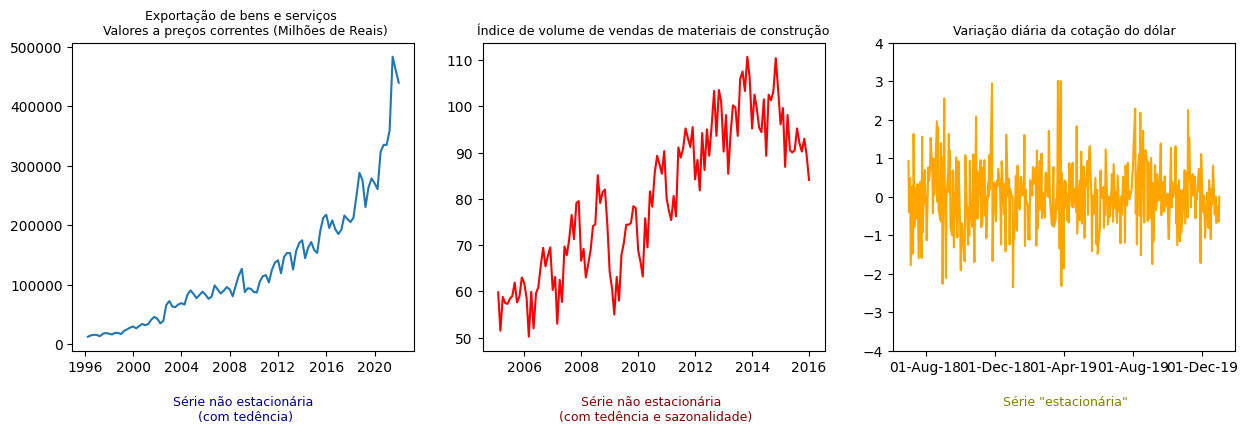

In [ ]:
# Séries temporais
df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Exportações") #IBGE - Trimestral
df2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="dolar") #Economial UOL - diária
df3=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Vendas") #IBGE - mensal

#@markdown Séries Temporais
import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='3/1/1996', end='12/31/2021', freq='3M')
index_dates2 = pd.date_range(start='7/2/2018', end='12/31/2019', freq='B')
index_dates3 = pd.date_range(start='1/1/2005', end='12/31/2015', freq='M')

df1.index=index_dates1
df2.index=index_dates2
df3.index=index_dates3

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,4))
ax1.plot(df1.index, df1.Exportações)
ax1.set_title('Exportação de bens e serviços \n Valores a preços correntes (Milhões de Reais)',fontdict = {'fontsize' : 9})
ax1.set_xlabel('\n Série não estacionária \n (com tedência)',fontdict = {'fontsize' : 9},color="darkblue")

ax2.plot(df3.index, df3["volume_vendas"], c='r')
ax2.set_title('Índice de volume de vendas de materiais de construção',fontdict = {'fontsize' : 9})
ax2.set_xlabel('\n Série não estacionária  \n (com tedência e sazonalidade)',fontdict = {'fontsize' : 9},color="darkred")


ax3.plot(df2.index.to_pydatetime(), df2["Var"], c='orange')
ax3.xaxis.set_major_locator(mdates.MonthLocator([4,8,12]))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax3.set_title('Variação diária da cotação do dólar',fontdict = {'fontsize' : 9})
ax3.set_xlabel('\n Série "estacionária"',fontdict = {'fontsize' : 9},color="olive")

ax3.set_ylim([-4, 4]);

## Modelos ARIMA

### Conceitos importantes
Os modelos Autoregressive Integrated Moving Average (ARIMA) fornecem uma abordagem para a previsão de séries temporais visando a descrever as autocorrelações nos dados. Antes de introduzirmos os modelos ARIMA, devemos primeiro discutir o conceito de estacionariedade e a técnica de diferenciação de séries temporais.

### Estacionariedade

A média e a variância de **processos estacionários** são constantes ao longo do tempo, intuitivamente isto significa que as observações se desenvolvem aleatoriamente entorno de um certo nível com variabilidade constante.


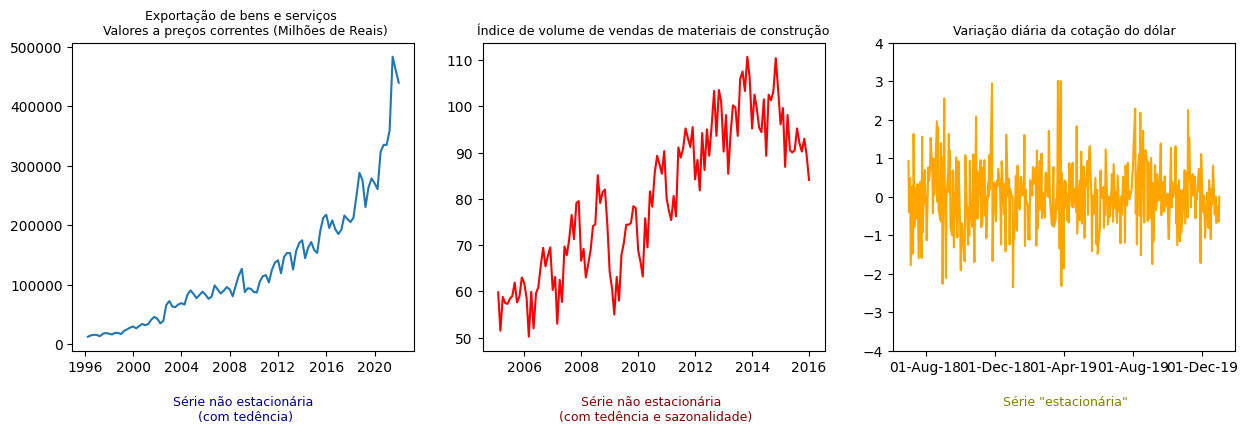

In [ ]:
# Séries temporais
df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Exportações") #IBGE - Trimestral
df2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="dolar") #Economial UOL - diária
df3=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Vendas") #IBGE - mensal

#@markdown Séries Temporais
import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='3/1/1996', end='12/31/2021', freq='3M')
index_dates2 = pd.date_range(start='7/2/2018', end='12/31/2019', freq='B')
index_dates3 = pd.date_range(start='1/1/2005', end='12/31/2015', freq='M')

df1.index=index_dates1
df2.index=index_dates2
df3.index=index_dates3

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,4))
ax1.plot(df1.index, df1.Exportações)
ax1.set_title('Exportação de bens e serviços \n Valores a preços correntes (Milhões de Reais)',fontdict = {'fontsize' : 9})
ax1.set_xlabel('\n Série não estacionária \n (com tedência)',fontdict = {'fontsize' : 9},color="darkblue")

ax2.plot(df3.index, df3["volume_vendas"], c='r')
ax2.set_title('Índice de volume de vendas de materiais de construção',fontdict = {'fontsize' : 9})
ax2.set_xlabel('\n Série não estacionária  \n (com tedência e sazonalidade)',fontdict = {'fontsize' : 9},color="darkred")


ax3.plot(df2.index.to_pydatetime(), df2["Var"], c='orange')
ax3.xaxis.set_major_locator(mdates.MonthLocator([4,8,12]))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax3.set_title('Variação diária da cotação do dólar',fontdict = {'fontsize' : 9})
ax3.set_xlabel('\n Série "estacionária"',fontdict = {'fontsize' : 9},color="olive")

ax3.set_ylim([-4, 4]);

### Função de autocorrelação

No processo de identificação de modelos ARIMA, a análise da estrutura de dependência serial dos dados é fundamental. Em algumas séries, observa-se que o valor atual está correlacionado com seus valores passados e a força dessa dependência diminui quando considerados valores mais distantes no tempo ("lags").


A função de autocorrelacão (ACF) permite visualizar as correlaçãoes entre observações distantes k períodos de tempo. Assim, para um "lag=1" representa-se como valores sucessivos da série estão correlacionados.

Na função de autocorrelação amostral intervalos de confiança de 95% são traçados para verificar se as autocorrelações são significativamente diferentes de zero.

**Observação!** Recomenda-se analisar o ACF de **série estacionárias**. As séries **não estacionárias** possuem um ACF com decaimento muito lento e não é possível analisar seus valores.

#### **Exemplo**.
A seguir apresenta-se o ACF de uma série (simulada) cujos valores sucessivos estão correlacionados. A série foi gerada de tal forma que a correlação entre o valor no instante $t$ e $t-1$ seja de $0,7$. Note que a correlação da série no instate $t$ e $t-k$ diminuiu quando $k$ aumenta, i.e, quando analisamos a correlação da série no instante $t$ com valores mais distantes no tempo. Faz sentido, não?

In [ ]:
#@markdown Simulando uma série com valores sucessivos autocorrelacionados
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_process import ArmaProcess
ar1 = np.array([1,-0.7])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data = AR_object1.generate_sample(nsample=1000);

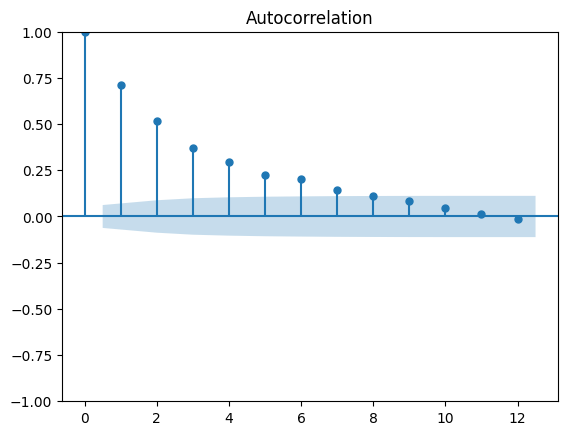

In [ ]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
x=plot_acf(simulated_data, lags=12)

Note que a correlação que considera valores sucessivos ($Z_t$ e $Z_{t-1}$, ou seja, $lag=1$) é de 0,7 e essas correlações decaem exponencialmente quando analisadas as associações entre valores mais distantes. Observa-se que para valores "muito" distantes no tempo (lags >7) a correlação é zero estatísticamente falando.

### Função de autocorrelação parcial (PACF)

As autocorrelações parciais são usadas para medir o graus de associação entre $Z_{t}$ e $Z_{t-k}$, quando os efeitos das outras defasagens são removidos.

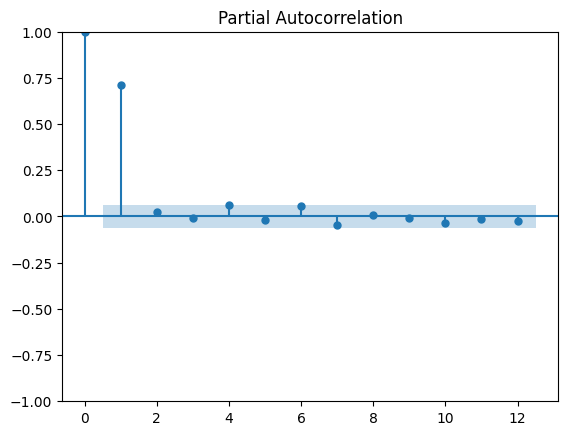

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
x=plot_pacf(simulated_data, lags=12);

Obseva-se que somente a correlação do lag=1 é significativamente diferente de zero, ou seja, para tentar entender o valor da série no instante $"t"$ podemos usar a informação contida no instante $"t-1"$.

### Diferenciação

Muitas séries analisadas na prática são não estacionárias, mas ao tomarmos algumas diferenças a série se torna estacionária.  Tomando-se uma diferença elimina-se uma tendência linear.




Seja $Z_t$ o valor da série no instante $t$. A primeira diferença é dada por:

$$ \Delta Z_t = Z_t -Z_{t-1} $$

Em geral, tomar uma ou duas diferenças é suficiente para eliminar tendências da série e torná-la estacionária.

Quando a série é sazonal  é apropriado tomar as diferenças para o período de
sazonalidade. Considere o caso de uma série mensal cujos valores apresentam um comportamento períodico que se repete a cada ano. Assim, recomenda-se tomar uma diferença sazonal

$$ \Delta Z_t = Z_t -Z_{t-12} $$


### Exemplo (eliminar a tendência)

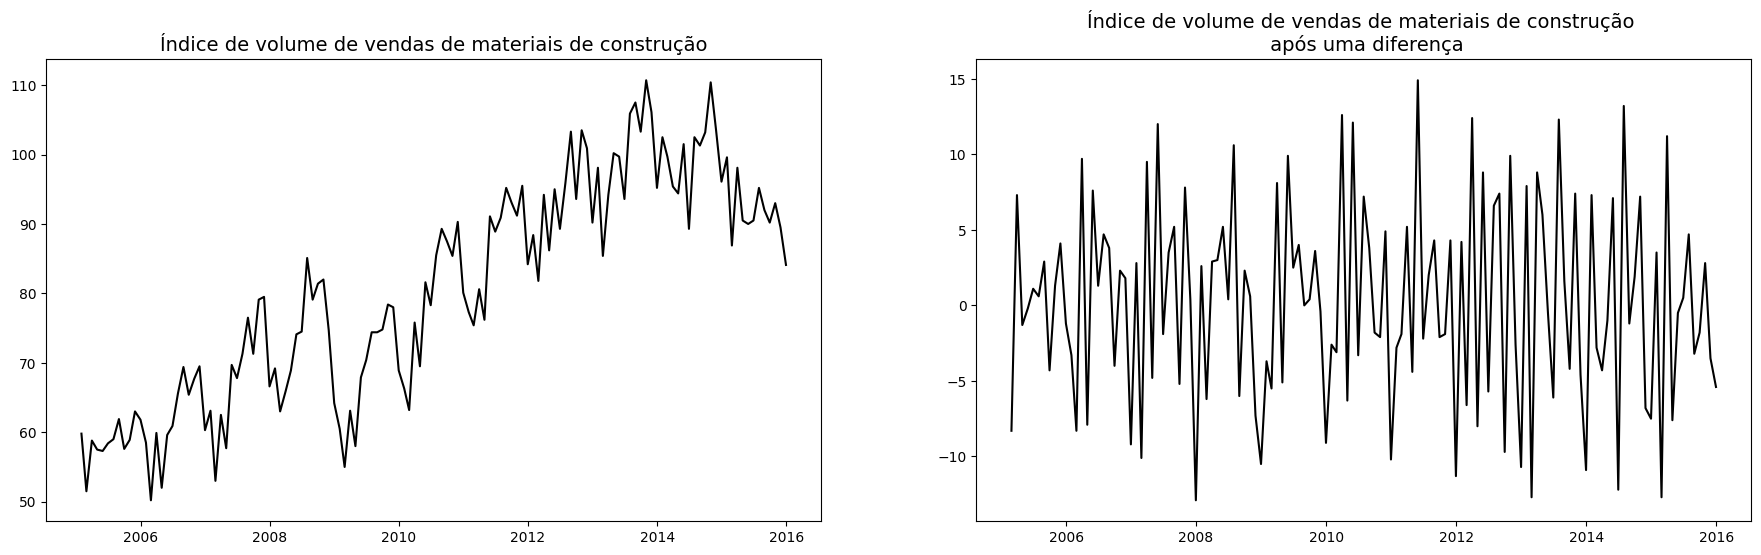

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(22,6))

# Série original
ax1.plot(df3.index, df3["volume_vendas"],color="black")
ax1.set_title('Índice de volume de vendas de materiais de construção',fontdict = {'fontsize' : 14})

# Série diferenciada
ax2.plot(df3.index, df3["volume_vendas"].diff(),color="black")
ax2.set_title('Índice de volume de vendas de materiais de construção \n após uma diferença',fontdict = {'fontsize' : 14})

plt.show()

Note que após uma diferença eliminou-se a tendência da série.

### Ajustando um modelo ARIMA
Os modelos ARIMA permitem modelar processos chamados de não estacionários homogêneos, denotado por ARIMA(p,d,q), em d indica o número de diferenças necessárias para que a série se torne estacionária, p é o número total de termos defasados $(Z_{t-1}, Z_{t-2},...,Z_{t-p})$ da série que que influenciam no instante $t$ (parte Autorregressiva (AR) do modelo), e $q$ o número total de termos defasados de erros aleatórios $(e_{t-1}, e_{t-2},...,e_{t-q})$ correspondente à parte de Médias móveis (MA), sua interpretação é menos intuitiva.

### Passos para ajustar um modelo ARIMA

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/Fluxograma2.png" width=300 align="middle">



1. Verificar se a série é estacionária. Um procedimento simples consiste em plotar os valores observados da série ao longo do tempo e verificar se há tendências ou sazonalidades (comportamentos de séries não estacionárias). Quando visualmente não é possível determinar se a série é ou não estacionária pode-se aplicar o teste de raízes unitárias Dickey-Fuller (Df) que será discutido nesta seção. Para eliminar tendências e tornar a série estacionária podem-se aplicar d diferenças (ou em alguns casos, ajustar retas de tendências por meio de polinômios)

2. Com a série estacionária, após d diferenças, selecionam-se possíveis valores de p e q com ajuda das funções ACF e PACF amostrais.

3. Ajustam-se modelos ARIMA(p,d,q) com os valores de p, d e q definidos nos dois passos anteriores.

4. Para selecionar o melhor modelo, isto é, aquele que se ajusta melhor aos dados pode-se usar, por exemplo, o critério de seleção AIC. Aquele modelo que apresentar o menor valor para este critério deve ser considerado.

5. Analisar os resíduos do modelo selecionado no passo 4. Deve-se verificar que os resíduos sejam independentes (não correlacionados), com média zero e variância constante. Vocês podem usar um gráfico de ACF e de linhas para checar estes pressupostos. Por fim, os resíduos devem seguir uma distribuição normal, pressuposto necessário para realizar previsões e construir intervalos de confiança. Aqui podem ser implementados histogramas e/ou gráficos QQ-plot.


$$\underbrace{\Delta^d Z_t}_\text{Série após d diferenças} =\mu+ \underbrace{\phi_1 \Delta^dZ_{t-1}+ \phi_2\Delta^dZ_{t-2}+...+\phi_p\Delta^d Z_{t-p}}_\text {Autorregressiva (AR)} + e_t + \underbrace{\theta_1e_{t-1}+ \theta_2 e_{t-2}+...+ \theta_q e_{t-q}}_\text{Médias móveis (MA)}, $$

em que $\phi_1,...,\phi_p, \theta_1,...,\theta_q$ são valores a serem estimados. Geralmente $e_t \sim N (0,\sigma^2)$.

### Exemplo 1

Vamos ajustar a série mensal do preço médio de venda no atacado de óleo de soja refinado (20 unidades) no estado de Paraná. Período de análise: janeiro de 1997 a dezembro de 2019. Valores em Reais (R$). Dados obtidos do site: https://www.agricultura.pr.gov.br/deral/precos.


In [ ]:
df=pd.read_csv(path+'series_oleo_soja.csv', delimiter=';', decimal=",")
df.index = pd.date_range(start='1/1/1997', end='12/31/2019', freq='M')

,ano,mês,valor
1997-01-31,1997,janeiro,15.17
1997-02-28,1997,fevereiro,15.49
1997-03-31,1997,março,15.73
1997-04-30,1997,abril,15.56
1997-05-31,1997,maio,15.65


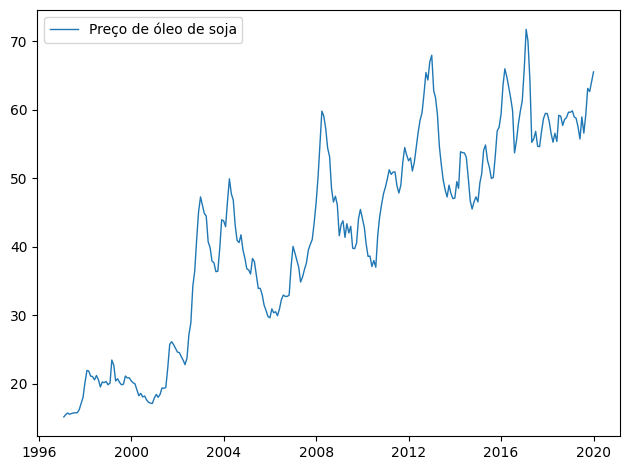

In [ ]:
fig, ax = plt.subplots()

tspplot(df.valor,label='Preço de óleo de soja',ax=ax)
tspdisplay('df.head()')

Repare que os preços de venda no atacado de óleo de soja refinado apresentam uma tendência crescente ao longo do período de estudo e um comportamento aparentemente sazonal.  Os preços mensais variam entre 15,17 reais (registrado em abril de 1997) e 71,77 reais (valor atingido em setembro de 2019). O interesse neste exercício é mostrar como ajustar uma serie usando os modelos ARIMA visando fazer previsões a curto prazo.

A seguir, apresenta-se a função ACF da série.

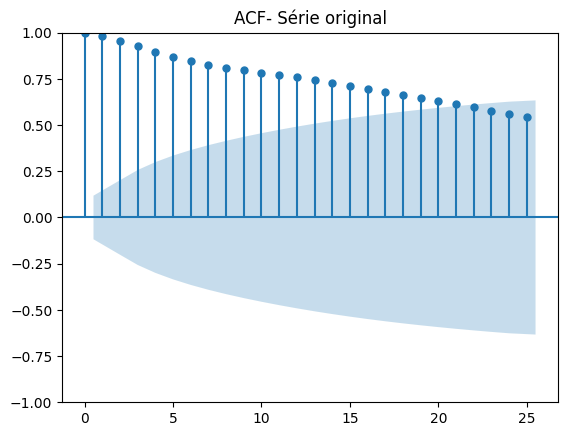

In [ ]:
# Acf série original
y=plot_acf(df.valor, title="ACF- Série original")

Repare que há um decrescimento lento na função ACF, esse comportamento é esperado uma vez que a série não é estacionária. Para eliminar a tendência e tornar a série estacionária vamos tomar uma diferença e, posteriormente, vamos analisar a sua função ACF e PACF para definir possíveis valores de $p$ e $q$ do modelo ARIMA.

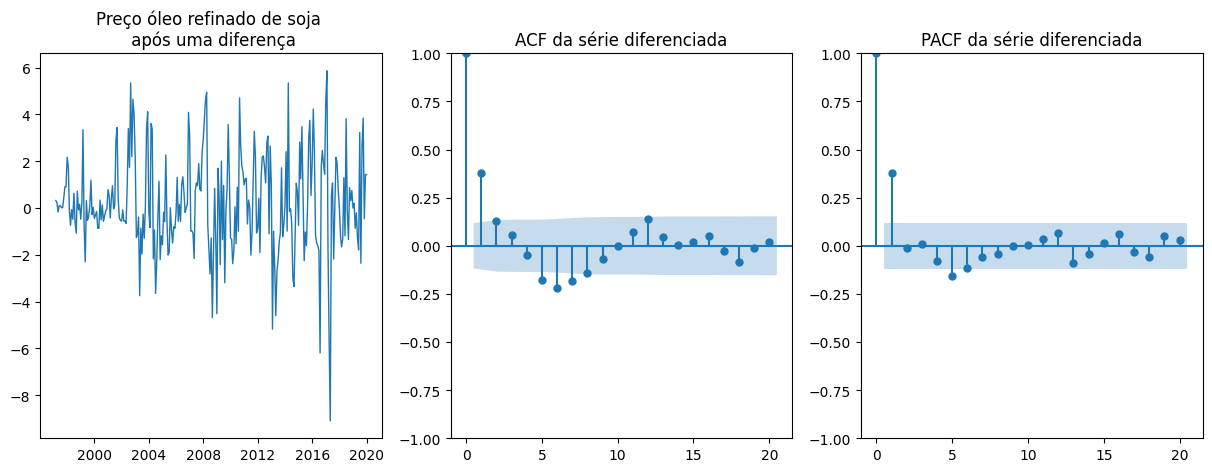

In [ ]:
# Analisando o ACF
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))

ax1.plot(df.index, df.valor.diff(),linestyle='solid',alpha=1,lw=1)
ax1.set_title('Preço óleo refinado de soja \n após uma diferença')

y1=plot_acf(df.valor.diff().dropna(), lags=20, ax=ax2, title="ACF da série diferenciada")
y2=plot_pacf(df.valor.diff().dropna(),ax=ax3, lags=20, title="PACF da série diferenciada");

Note que a série diferenciada se desenvolve, aparentemente, de forma aleatória em torno de zero com menor variabilidade no começo da série, isto decorre da pouca variação dos preços nos primeiros anos. Vamos aplicar o teste DF para verificar a estacionariedade da série diferenciada.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.valor.diff()[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.136881
p-value: 0.000000


Como o valor-p é menor que 0,05 podemos assumir que a série diferenciada é estacionária, assim, para verificar os possíveis valores de $p$ e/ou $q$ que podem ser implementados no modelo ARIMA(p,d,q) vamos analisar as funções ACF e PACF da série após uma diferença. Na função PACF observa-se que seria interessante considerar no modelo a informação defasada dos lags 1, 5 e 6 uma vez que são estatisticamente diferentes de zero (estão fora do intervalo de confiança). Assim, serão ajustados modelos ARIMA(p,d,q) com $d=1 $ e $p$ e $q$ no intervalo de 0 a 6. Os termos de médias móveis serão considerados para tentar melhorar o ajuste do modelo. Para selecionar o "melhor" modelo vamos considerar o critério AIC.
A seguir, apresenta-se o AIC dos modelos ajustados, neste passo vamos deixar o último ano da série para verificar a acurácia do modelo para fazer previsões.

In [ ]:
# Create Training and Test

test_size = 12
train_size = len(df) - test_size

train = df.valor[:train_size]
test = df.valor[train_size:]


In [ ]:
# Valores de AIC
import itertools

for i, j in itertools.product(range(7), range(7)):
  print("AIC do modelo","ARIMA(",i,", 1 ,",j,"):",
        round(ARIMA(train, order=(i, 1, j),
                    enforce_stationarity=True,
                    enforce_invertibility=True).fit(method_kwargs={'maxiter':700}).aic,4))

AIC do modelo ARIMA( 0 , 1 , 0 ): 1131.1734
AIC do modelo ARIMA( 0 , 1 , 1 ): 1091.2241
AIC do modelo ARIMA( 0 , 1 , 2 ): 1088.9615
AIC do modelo ARIMA( 0 , 1 , 3 ): 1090.6947
AIC do modelo ARIMA( 0 , 1 , 4 ): 1090.6036
AIC do modelo ARIMA( 0 , 1 , 5 ): 1092.4909
AIC do modelo ARIMA( 0 , 1 , 6 ): 1090.8253
AIC do modelo ARIMA( 1 , 1 , 0 ): 1086.6213
AIC do modelo ARIMA( 1 , 1 , 1 ): 1088.4085
AIC do modelo ARIMA( 1 , 1 , 2 ): 1090.4084
AIC do modelo ARIMA( 1 , 1 , 3 ): 1090.1473
AIC do modelo ARIMA( 1 , 1 , 4 ): 1091.1918
AIC do modelo ARIMA( 1 , 1 , 5 ): 1088.1165
AIC do modelo ARIMA( 1 , 1 , 6 ): 1088.5307
AIC do modelo ARIMA( 2 , 1 , 0 ): 1088.4083
AIC do modelo ARIMA( 2 , 1 , 1 ): 1085.482
AIC do modelo ARIMA( 2 , 1 , 2 ): 1092.4081
AIC do modelo ARIMA( 2 , 1 , 3 ): 1082.1287
AIC do modelo ARIMA( 2 , 1 , 4 ): 1083.8194
AIC do modelo ARIMA( 2 , 1 , 5 ): 1085.0231
AIC do modelo ARIMA( 2 , 1 , 6 ): 1087.0159
AIC do modelo ARIMA( 3 , 1 , 0 ): 1090.4074
AIC do modelo ARIMA( 3 , 1 , 1 ):

O modelo ARIMA (2,1,3) apresentou o menor valor de AIC. Assim, vamos analisar os resíduos deste modelo para verificar se há alguma violação dos pressupostos. Lembre-se de que o último ano da série não foi considerado no ajuste do modelo e suas observações serão usadas para verificar a acurácia do modelo para fazer previsões.

Observação: Você pode reparar que alguns modelos não convergem isto porque usando esses de $p$ e $q$ não se garante a estacionaridade ou invertibilidade do modelo ARIMA.

In [ ]:
# Ajustando o modelo ARIMA

model=ARIMA(train, order=(2, 1, 3))
print(model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                  264
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -535.064
Date:                Mon, 28 Aug 2023   AIC                           1082.129
Time:                        13:36:31   BIC                           1103.562
Sample:                    01-31-1997   HQIC                          1090.742
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5950      0.051     31.137      0.000       1.495       1.695
ar.L2         -0.9437      0.047    -20.063      0.000      -1.036      -0.852
ma.L1         -1.2267      0.085    -14.494      0.0

A série mensal Preço de óleo de soja foi ajustada com 264 observações. Ao nível de significância de 5% todos os parâmetros são estatisticamente diferentes de zero (valores-p: (P>|z|)< 0.05). Assim, o modelo ajustado fica dado pela expressão:

<center> $Y_t= Y_{t-1}+1,595 (Y_{t-1}-Y_{t-2})-0,9437(Y_{t-2}-Y_{t-3})+1,2367 e_{t-1}-0,4681 e_{t-2}- 0,2681 e_{t-3} +e_t$,</center>


em que $Var(e_t)=3,4141$. A seguir, vamos realizar uma análise dos resíduos deste modelo. Este passo permite realizar previsões com intervalos de confiança confiáveis, isto deve-se ao fato que os intervalos são construídos assumindo normalidade.

#### Análise de resíduos

In [ ]:
# Resíduos
res=model.fit()
res_standard=(res.resid-res.resid.mean())/np.sqrt(res.resid.var())#standardized residuals
ts=df

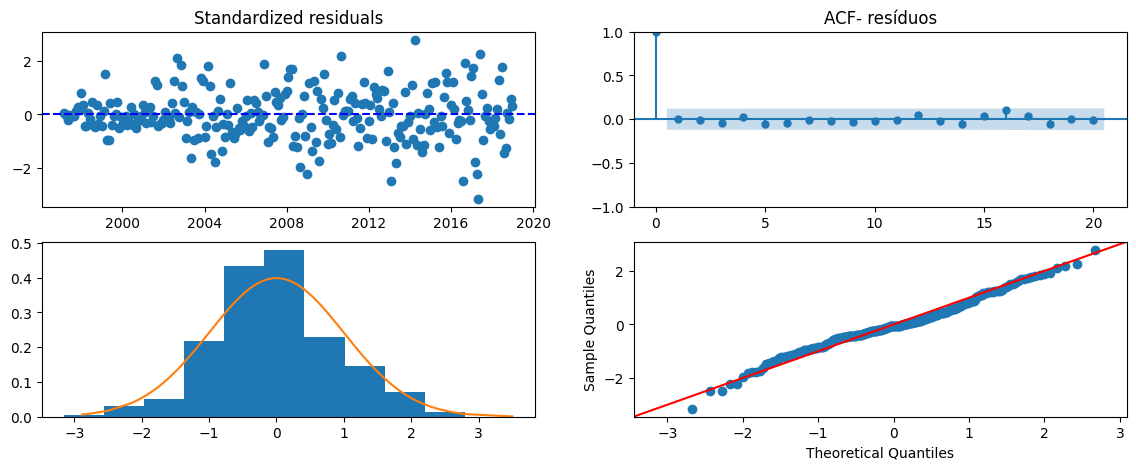

In [ ]:
# Gráficos do ajuste
#@markdown

import scipy.stats as stats
import statsmodels.api as sm

fig,axs = plt.subplots(2, 2,figsize=(14,5))

axs[0,0].scatter(ts.index[1:train_size], res_standard[1:train_size])
axs[0,0].axhline(y=0, color='b', linestyle='--')
axs[0,0].set_title('Standardized residuals')

x=plot_acf(res.resid, lags=20, ax=axs[0,1], title="ACF- resíduos");

axs[1,0].hist(res_standard[1:train_size], density=True);
x=np.sort(np.random.normal(0, 1, 1000))
axs[1,0].plot(x, stats.norm.pdf(x, 0, 1))
x1=sm.qqplot(res_standard[1:train_size], line ='45', ax=axs[1,1])

Note que os resíduos seguem, aproximadamente, uma distribuição normal e são independentes (ver ACF, todos os lags são estatisticamente zero), isto é, toda a informação contida no histórico da série foi considerado no modelo ARIMA. Por fim, em uma nova análise recomenda-se tentar transformar os dados, por exemplo, aplicar a função logaritmo para tentar ajustar a maior variabilidade que se observa nos resíduos nos últimos anos da série.

#### Forecast
Vamos fazer as previsões para o último ano da série, com intervalo de confiança de 95%, para analisar a habilidade do modelo ARIMA (2,1,3) para fazer previsões. Lembre-se que na modelagem não consideramos esses valores.

A seguir, apresenta-se o gráfico da série com as previsões e seus intervalos de confiança para o último ano e os valores observados nesse período

In [ ]:
#forecast h=12
forecast = model.fit().get_forecast(12)
forecast.predicted_mean

# Previsões com intervalos de confiança de 95%
fc_series = pd.Series(forecast.predicted_mean, index=test.index)
lower_series = pd.Series(forecast.conf_int(alpha = 0.05)["lower valor"], index=test.index)
upper_series = pd.Series(forecast.conf_int(alpha = 0.05)["upper valor"], index=test.index)

In [ ]:
df_prev=pd.DataFrame({"Previsões":fc_series,
              "Limite Inferior IC 95%":lower_series,
              "Limite Superior IC 95%":lower_series})
tspdisplay('df_prev') # Mostrar as 12 previsões?

,Previsões,Limite Inferior IC 95%,Limite Superior IC 95%
2019-01-31,58.576791,54.955306,54.955306
2019-02-28,57.573033,51.435592,51.435592
2019-03-31,57.217222,49.068931,49.068931
2019-04-30,57.596997,47.642999,47.642999
2019-05-31,58.538511,46.964389,46.964389


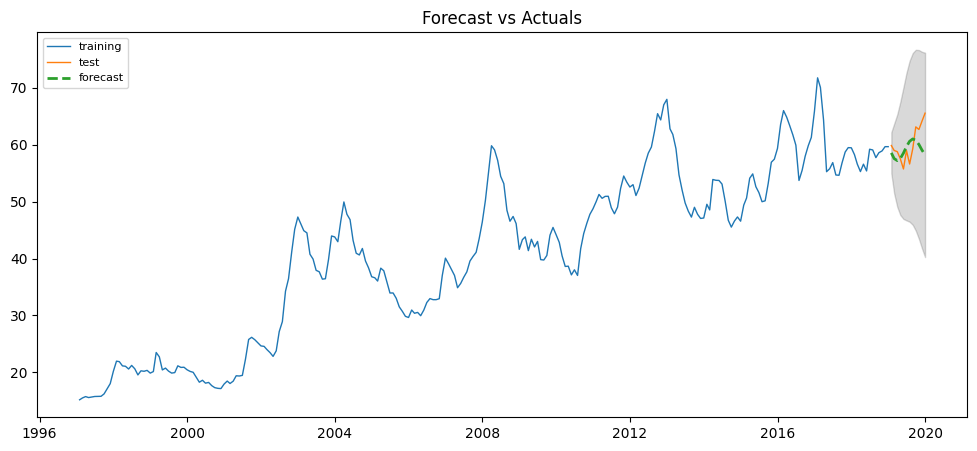

In [ ]:
#@markdown

plt.figure(figsize=(12,5))

plt.plot(train, label='training',linestyle='solid',alpha=1,lw=1)
plt.plot(test, label='test',linestyle='solid',alpha=1,lw=1)
plt.plot(fc_series, label='forecast',linestyle='dashed',alpha=1,lw=2)
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()

Você considera que as previsões são boas?

Vale ressaltar que o modelo ARIMA (2,1,3) está considerando que o instante $t$ está sendo influenciado (correlacionado) pelos valores da série nos instantes $t-1$ e $t-2$. Assim, quando fazemos a previsão para janeiro de 2019 temos informação (valor observado) da série do mês anterior, dezembro de 2019 $(t-1)$ e de novembro de 2019 $(t-2)$. No entanto, quando fazemos a previsão para fevereiro de 2020 já não temos informação (observada) do mês anterior, só temos um valor previsto pelo modelo, por esse motivo as previsões mais distantes apresentam maior erro (o intervalo de confiança aumenta) e seus valores tendem a acompanhar o comportamento da tendência da série (modelada pela diferença).

Para avaliar o desempenho do modelo para fazer previsões vamos usar algumas métricas discutidas no capítulo 1.

Algumas medidas com as quais é possível avaliar a habilidade do modelo para fazer previsões.
\
\
MAPE= $\dfrac{1}{N} \sum_t \dfrac{|forecast_t - observado_t|}{|observado_t|}$
\
\
MAE=$\dfrac{1}{N} \sum_t |forecast_t - observado_t|$
\
\
RMSE= $ \sqrt{\dfrac{1}{N} \sum_t (forecast_t - observado_t)^2}$,

em que $N$ é a quantidade de valores previstos pelo modelo.

In [ ]:
# acuracia

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(forecast.predicted_mean, test.values)

{'mape': 0.042094716349703104,
 'me': -1.0329122066205272,
 'mae': 2.5784002749542023,
 'mpe': -0.01498617153370623,
 'rmse': 3.2313144814554926}

Observe que o erro médio absoluto (MAE) das previsões é de 2.5 reais.

**Observação** Na prática, podemos usar alguma dessas métricas junto com o critério AIC para escolher o "melhor" modelo.


#### Forecast one step

É interessante analisar o desempenho do modelo para fazer previsões se atualizamos na base de dados a cada valor observado. As previsões melhoram?

No código a seguir, são realizadas previsões um passo à frente, ou seja, prevê-se o valor da série para o próximo mês, e após a observação desse valor, a base de dados é atualizada


In [ ]:
# forecast atualizando cada valor observado

X = df.valor

history = [x for x in train]
predictions = list()
low1= list()
upper1= list()
forecast_one_step=pd.DataFrame()


for t in range(len(test)):
  model= ARIMA(history,order=(2,1,3))
  model_fit=model.fit()
  forecast = model_fit.get_forecast(1)
  yhat=forecast.predicted_mean
  low=forecast.conf_int(alpha = 0.05)[0,0]
  upper=forecast.conf_int(alpha = 0.05)[0,1]
  predictions.append(yhat)
  low1.append(low)
  upper1.append(upper)
  obs= test[t]
  history.append(obs)

forecast_one_step["forecast"]=predictions
forecast_one_step["low"]=low1
forecast_one_step["upper"]=upper1
forecast_one_step.index=test.index

tspdisplay('forecast_one_step') # mostrar 12 previsões?

,forecast,low,upper
2019-01-31,[58.57679089989537],54.955306,62.198275
2019-02-28,[59.44140936520137],55.823085,63.059734
2019-03-31,[58.688440995126825],55.076703,62.300179
2019-04-30,[59.28738401697057],55.682432,62.892336
2019-05-31,[57.73786240419453],54.133429,61.342296


A série com as previsões um passo à frente e seus intervalos de confiança para o último ano e os valores observados nesse período são apresentados a seguir,

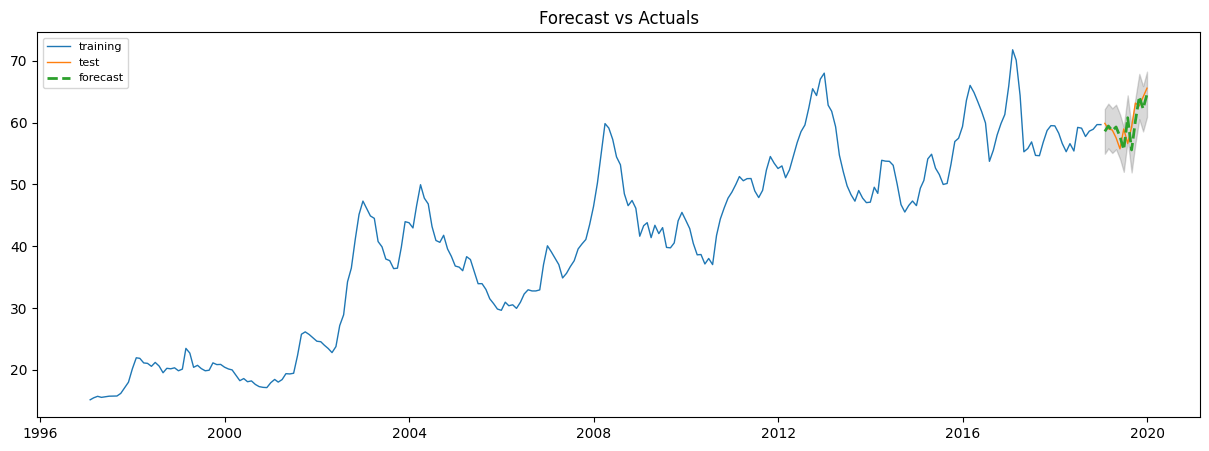

In [ ]:
#@markdown

plt.figure(figsize=(15,5))

plt.plot(train, label='training',linestyle='solid',alpha=1,lw=1)
plt.plot(test, label='test',linestyle='solid',alpha=1,lw=1)
plt.plot(forecast_one_step["forecast"], label='forecast',linestyle='dashed',alpha=1,lw=2)
plt.fill_between(forecast_one_step.index, forecast_one_step["low"], forecast_one_step["upper"], color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Nota-se que os valores previstos e observados são muito próximos quando atualizamos os valores conforme observados. O erro médio absoluto (MAE) das previsões diminuiu para 2,01 reais e o MAPE para 3,37%.

In [ ]:
print("MAE:", np.mean(np.abs(forecast_one_step["forecast"] - test)))
print("mape", np.mean(np.abs(forecast_one_step["forecast"] - test)/np.abs(test)))

MAE: [2.01155229]
mape [0.03376468]


#### **Autoarima**

Podemos implementar a biblioteca pmdarima para selecionar o "melhor" modelo usando algum critério de informação.

**Cuidado**! Este pacote geralmente apresenta alguns erros uma vez que o pacote pmdarima sobrepõe a instalação do statsmodel, isso pode gerar alguns problemas. Recomendo, portanto, que você empregue programas separados para utilizar em separado o statsmodel e o pmdarima, o tenha cuidado no uso conjunto.

In [ ]:
#!pip install pmdarima

In [ ]:
#import pmdarima as pm
#model_auto = pm.auto_arima(df.valor, d=1,information_criterion="aic",trace=1,stepwise=False)
#print(model_auto.summary())

Note que chegamos no mesmo modelo ARIMA(2,1,3).